---   

<img align="left" width="110"   src="https://upload.wikimedia.org/wikipedia/commons/c/c3/Python-logo-notext.svg"> 


<h1 align="center">Tools and Techniques for Data Science</h1>
<h1 align="center">Course: Deep Learning</h1>

---
<h3 align="right">Muhammad Sheraz (Data Scientist)</h3>
<h1 align="center">Day49 (Cat VS Dog Classifier)</h1>

<img src="Images/cat_vs_dog.png"> 

In [1]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:49<00:00, 24.0MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.0MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [8]:
#generators
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
#Normalize
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [11]:
#create CNN Model

model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_1 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_2 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 78s 108ms/step - loss: 1.2083 - accuracy: 0.5745 - val_loss: 0.6778 - val_accuracy: 0.5752
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.6083 - accuracy: 0.6818 - val_loss: 0.5505 - val_accuracy: 0.7256
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4958 - accuracy: 0.7610 - val_loss: 0.4877 - val_accuracy: 0.7812
Epoch 4/10
625/625 [==============================] - 87s 139ms/step - loss: 0.4331 - accuracy: 0.8012 - val_loss: 0.5311 - val_accuracy: 0.7280
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3687 - accuracy: 0.8339 - val_loss: 0.4291 - val_accuracy: 0.8134
Epoch 6/10
625/625 [==============================] - 64s 103ms/step - loss: 0.3059 - accuracy: 0.8695 - val_loss: 0.4102 - val_accuracy: 0.8152
Epoch 7/10
625/625 [==============================] - 66s 105ms/step - loss: 0.2302 - accuracy: 0.9029 - val_loss: 0.8767 - val_ac

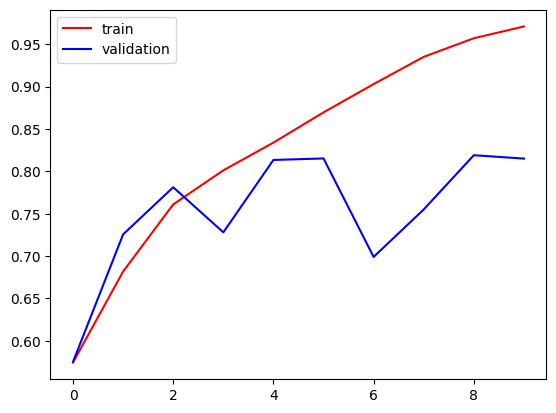

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

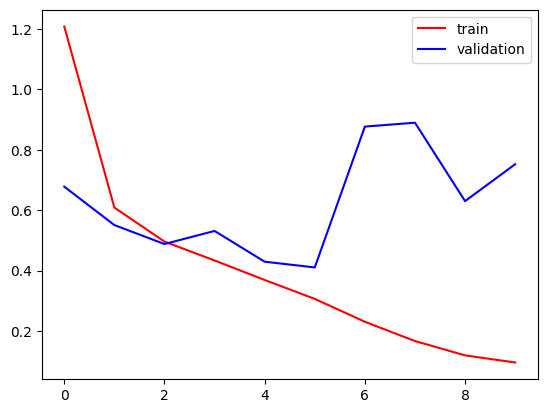

In [16]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [17]:
# ways to reduce overfitting

# Add more data
# Data Augmentation
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [18]:
import cv2

In [19]:
test_img=cv2.imread('/content/cat.jpeg')

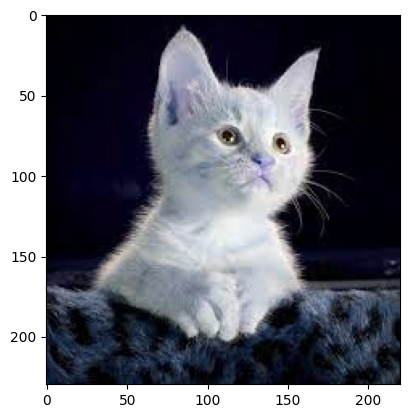

In [20]:
plt.imshow(test_img)

In [21]:
test_img=cv2.resize(test_img,(256,256))

In [22]:
test_input=test_img.reshape((1,256,256,3))

In [23]:
model.predict(test_input)

1/1 [==============================] - 1s 863ms/step


array([[6.8196394e-24]], dtype=float32)